[link](https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@7e517b97331f48e38ba0035df6ef8621/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@a8c1c13f42ed4f3da1898007f5cb55fe)

→ Последней реализацией ансамблирования, которую мы рассмотрим, станет бустинг. Этот метод отличается от предыдущих своей структурой.

Бустинг (boosting) — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

Примечание. Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями М. Кернсом и Л. Вэлиантом: «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые веса наблюдений. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

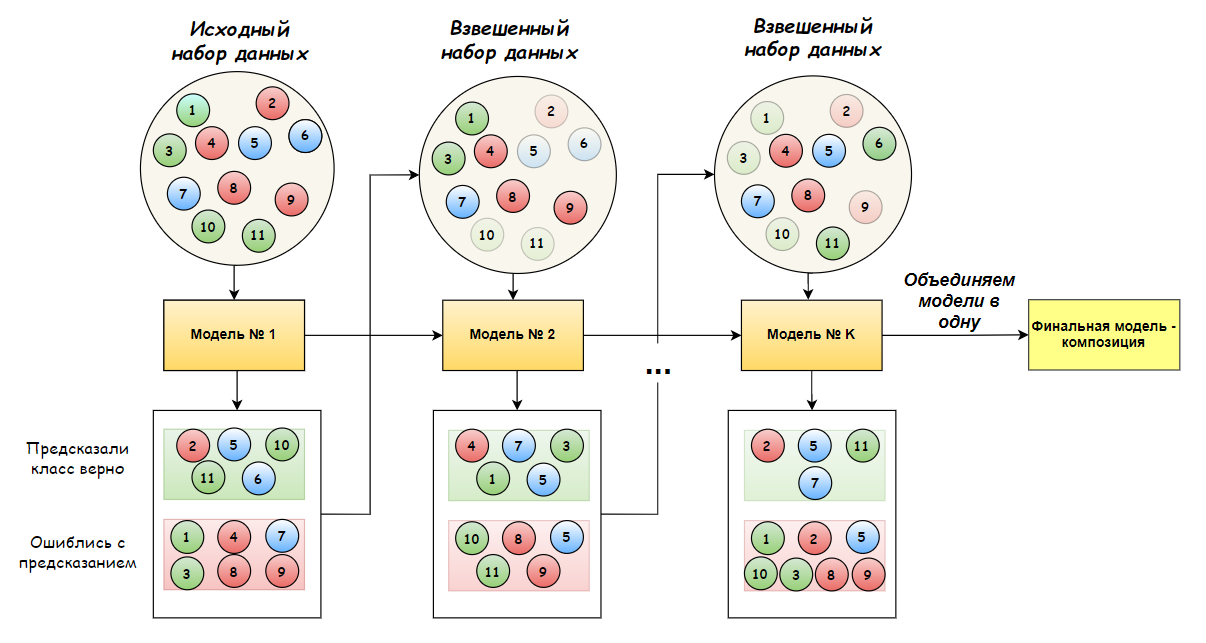

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

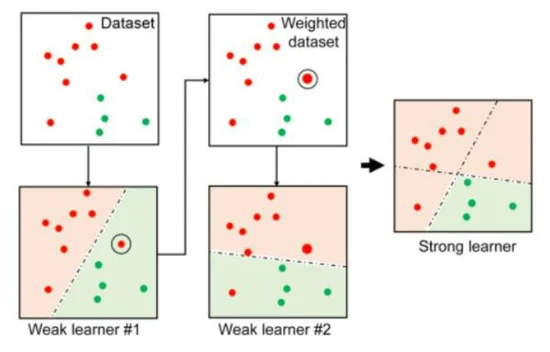

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

Примечание. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то цель бустинга — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают алгоритмы с высоким смещением и небольшим разбросом, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

В этом юните мы постараемся затронуть основные шаги эволюции бустинга от первой успешной модели до современных модификаций. Начнём рассмотрение с самой первой модели бустинга — адаптивного бустинга.

АДАПТИВНЫЙ БУСТИНГ 

Первая реализация бустинга называлась AdaBoost. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Так как алгоритм является несовершенным и в дальнейшем получил свое развитие, мы не будем подробно останавливаться на его работе. Однако приведем краткое описание работы алгоритма на примере задачи бинарной классификации. 

Пусть у нас есть набор данных , в котором  объектов размерности  (вектора в признаковом пространстве размера ) и метки класса , где -1 и 1 — метки отрицательного и положительного класса соответственно.

Будем строить ансамбль из  абстрактных базовых моделей — классификаторов. Обозначим их как  (это могут быть логистические регрессии/деревья решений или что-то ещё).  

1Перед обучением базовой модели мы инициализируем веса объектов обучающей выборки следующим образом: 
2Для всех  от  до :

1. Обучить базовую модель  с учётом весов объектов .

2. Вычислить ошибку классификатора , обозначим её за :



Примечание. Здесь выражение  — это знакомая нам по модулю классификации индикаторная функция. Она равна 1, если ответ  не совпал с предсказанием базовой модели , и 0 — в противном случае.

3. Тогда вес предсказаний данного классификатора (мера «вклада» предсказаний -ой модели в общий ансамбль) вычисляется по формуле: 
Формула веса становится нулевой только при случайном угадывании, то есть когда классификатор ошибается в половине меток — работает ровно так же, как и подбрасывание монетки. Однако остальные будут вносить вес в итоговую модель с положительным или отрицательным знаком (в этом легко убедиться, подставив вероятность ошибки, отличную от 0.5). Тем самым мы исключаем возможность вклада случайных классификаторов в результирующую модель.

4. Обновляем веса объектов в выборке. Для тех объектов, на которых мы допустили ошибку, вес увеличивается; для тех объектов, для которых наш ансамбль предсказал верный ответ — не изменяется. Формула обновления весов:



Видно, что если классификация была произведена верно для объекта , то степень экспоненты будет равна 0, а значит множитель  и вес  не изменится. 

Для того, чтобы привести все веса объектов к единому масштабу от 0 до 1, производится их нормировка путем деления каждого веса  на сумму всех весов:



5. После обучения каждой базовой модели предсказания ансамбля строятся как сумма из предсказаний базовых моделей, взятых с весом :  
.

Примечание. Функция  — функция взятия знака, принимает значение -1, если аргумент функции отрицательный, 0 — если аргумент функции нулевой, и 1 — если аргумент функции положительный.

В чём плюсы такого алгоритма?

✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

✔️ Показывает хорошую обобщающую способность.

✔️ Имеет возможность идентификации шумовых объектов.

Но в чём минусы?

⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.

⛔️ Склонен к переобучению при наличии шума в данных.

⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

АДАПТИВНЫЙ БУСТИНГ В SKLEARN

В sklearn адаптивный бустинг над решающими деревьями реализован в модуле sklearn.ensemble в виде классов AdaBoostRegressor и AdaBoostClassifier для задач регрессии и классификации соответственно. Давайте проведём обучение на тех же данных, что и в предыдущих моделях ансамблирования — на данных о диабете. 

Прежде чем перейти к практической части, предлагаем ознакомиться с параметрами AdaBoost:

estimator — параметр отвечает за природу базовых моделей, по умолчанию это DecisionTreeRegressor c максимальной глубиной (max_depth) 3.
n_estimators — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.
learning_rate — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.
loss{'linear', 'square', 'exponential'} — функция ошибки для обновления весов (в теоретической части мы рассматривали экспоненциальную форму обновления весов — 'exponential')
random_state — параметр, фиксирующий случайные процессы в модели.
Для сравнимости результатов со случайным лесом возьмём количество базовых моделей, равное 10. Как говорилось ранее, глубина деревьев должна быть меньше, чем у случайного леса. По умолчанию она равна 3.  

from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Будет выведено:
# Качество предсказания по MSE для AdaBoost 3116.48

ГРАДИЕНТНЫЙ БУСТИНГ

Градиентный бустинг (Gradient Boosting, GB) — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием. Впервые алгоритм был опубликован профессором статистики Стэнфордского университета Джеромом Фридманом. Алгоритм оказался очень эффективным и в дальнейшем был множество раз модифицирован — до Extreme Gradient Boosting (XgBoost) и других модификаций, таких как CatBoost от Яндекса и LightGMB от Microsoft.

Сейчас градиентный бустинг и его модификации применяются практически везде. Любой запрос на Яндексе, выбор отеля на Booking или сериала на Netflix — всё это работает на градиентном бустинге. 

→ В этом модуле мы кратко рассмотрим принцип работы, а в модулях по математике разберём математическую формализацию алгоритма. 

В GB принцип классического бустинга сохраняется: каждый последующий алгоритм улучшает предыдущий, но, в отличие эвристического «взвешивания» наблюдений, градиентный бустинг использует информацию о функции потерь для построения нового алгоритма. 

Допустим, у нас есть некоторая функция потерь . Она зависит от двух аргументов:  — истинный ответ,  — прогноз модели . Причём неважно, какая это функция потерь (на самом деле ограничение есть — это дифференцируемость функции, то есть существование производной).

Для задачи регрессии это может быть, например, MSE:

Для задачи классификации это может быть, например, logloss:

Примечание. Для logloss  в данном контексте означает не предсказанный класс для -ого наблюдения, а вероятность принадлежности к классу 1 -ого наблюдения, то есть на самом деле . Чистая формальность для идентичности записей для регрессии и классификации.

Пусть мы построили какую-то модель, которая решает задачу классификации или регрессии. Обозначим её  — это какая-то функция, которая принимает на вход объекты  и выдаёт для них предсказания. Качество такой модели, скорее всего, будет не очень хорошим, ведь мы обучаем слабые модели.

Однако мы знаем, на каких объектах модель давала точные предсказания, а на каких — ошибалась. Нужно попробовать использовать эту информацию и обучить ещё одну модель .

Допустим, мы знаем, что предсказание первой модели на каком-то объекте  на 10 больше, чем в реальности. То есть . То есть нам необходимо обучить следующую модель  таким образом, чтобы она предсказала для  ответ -10, то есть . Тогда предсказание идеально совпадает с действительностью:

→ Другими словами, следующая модель должна научиться предсказывать ошибки предыдущей.

В реальности вторая модель тоже не сможет обучиться идеально, поэтому обучим третью модель , которая будет «компенсировать» неточности первых двух. Будем продолжать так, пока не построим композицию из  алгоритмов.

Финальная модель (обозначим её за ), ищется в виде композиции из  базовых алгоритмов определённого семейства (например, линейных моделей/деревьев):

 

Этот подход можно интуитивно представить как игру в гольф. Цель гольфиста — закатить мяч в лунку (для нас это значит с абсолютной точностью предсказать ). Гольфист делает свой первый удар, получает новую координату мяча  (у нас это ответы алгоритма ). Следующий удар гольфист производит из положения:   и снова промахивается. Для нас это значит построить следующий алгоритм , который учится предсказывать ошибки предыдущего. После второго удара композиция — новое положение мяча будет равно:
Гольфист делает следующий удар  из положения:  . Новая координата мяча снова приближается к лунке и становится равной композиции:
А затем следует ещё один удар, и ещё один… И так, пока гольфист не попадёт в заветную лунку. А мы продолжаем обучать всё новые и новые модели , пока не сделаем идеального предсказания, двигаясь в сторону минимума функции потерь.

Финальная композиция, состоящая из K ударов будет равна: 

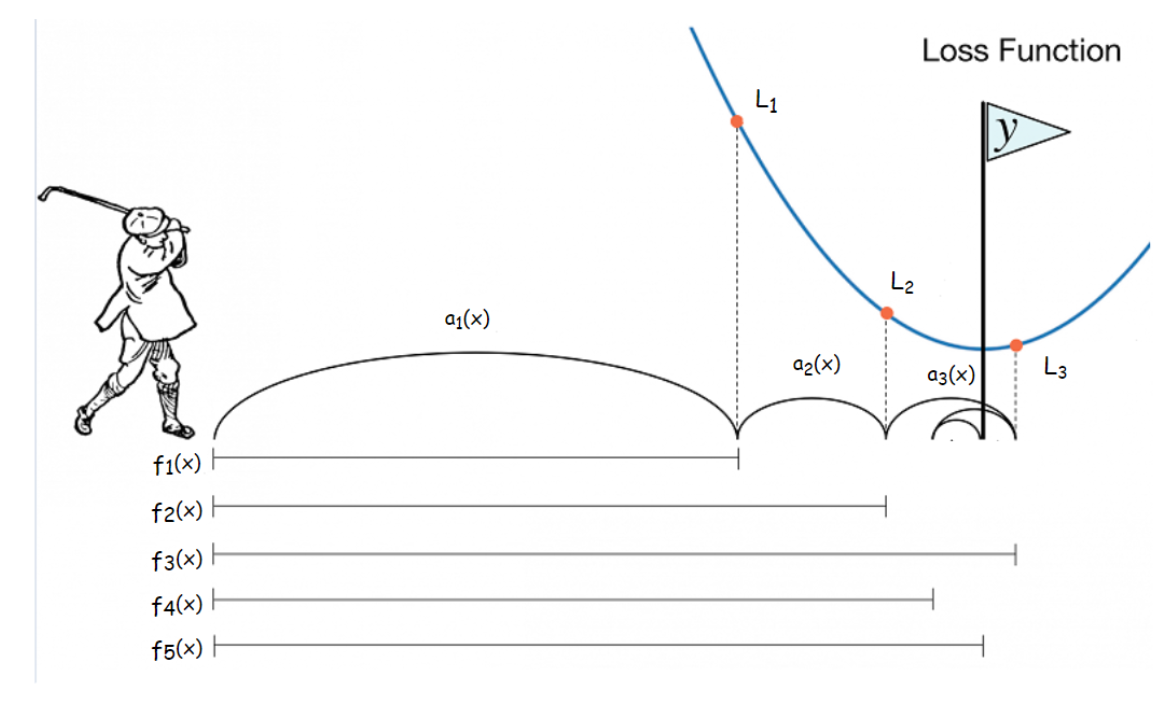

Немного математического формализма ↓

Пусть на какой-то момент было обучено  алгоритмов, где . Итоговая композиция будет иметь вид:

Тогда следующее слагаемое, модель  (обозначим её для краткости ), должна строиться по принципу:

Знакомая запись, не правда ли? Она означает, что нам нужно найти такой алгоритм , при котором наблюдается минимум функции потерь.

Чтобы построить эту модель , необходимо определить, что она будет пытаться предсказать.

Наша новая модель , по сути, должна предсказать вектор-столбец сдвигов (ошибок между истинными  и предсказаниями модели). Посмотрим на задачу под другим углом: нужно предсказать такой вектор, который двигает предсказания в сторону уменьшения функции ошибки.

Тут на сцену и выходит градиент, а точнее — антиградиент. Пусть мы пока не знаем математических тонкостей, но мы знаем, что этот вектор направлен в сторону убывания функции. Его и будем предсказывать моделью .

Допустим, мы каким-то образом рассчитаем этот антиградиент на обучающей выборке  (для всех популярных функций потерь уже выведены формулы его расчёта). Это будет просто вектор-столбец из каких-то чисел. Мы умеем предсказывать числа, то есть будем решать задачу регрессии: будем с помощью модели  предсказывать координаты этого вектора антиградиента. Например, можно построить такую модель , чтобы средний квадрат ошибки между её ответами и антиградиентом (MSE) был минимален.

Когда мы построим модель , мы добавим её ответы в композицию, но не все сразу, а умножим ответы на коэффициент  — темп обучения. Этот коэффициент влияет на то, какой вклад каждая следующая модель будет оказывать на общую композицию. То есть:

где  — ансамбль, построенный на -ом этапе,  — новый ансамбль, который будет построен на следующем этапе .

Примечание. Если принять, что предсказания  полностью совпадают с антиградиентом , то получится формула градиентного спуска:

Но градиентный спуск происходит не в пространстве параметров, а в пространстве ответов ансамбля . Что это за пространство и как в нём считать градиенты, мы обсудим, когда будем разбирать градиентный бустинг подробнее.

Сейчас же для нас важно понимать, что каждая новая модель бустинга будет строиться так, чтобы двигать всю композицию вниз по функции потерь — в сторону вектора антиградиента.

Зачем нужен параметр ?

Он позволяет избежать переобучения и плавно приближаться к минимуму функции потерь.

Например, модель для какого-то -ого наблюдения  предсказала, что ошибка (градиент) будет равна -5. Мы могли бы прибавить к полученным ранее ответам модели   эту 5:

Но так мы сразу сведём эту ошибку к 0 и подстроимся под обучающую выборку. Поэтому мы прибавляем не 5, а умножаем 5 на небольшое число , например на 0.1:

Тогда мы будем плавно уменьшать ошибку с каждой новой моделью.

Если базовая модель — это дерево решений, то схематично это будет выглядеть следующим образом:

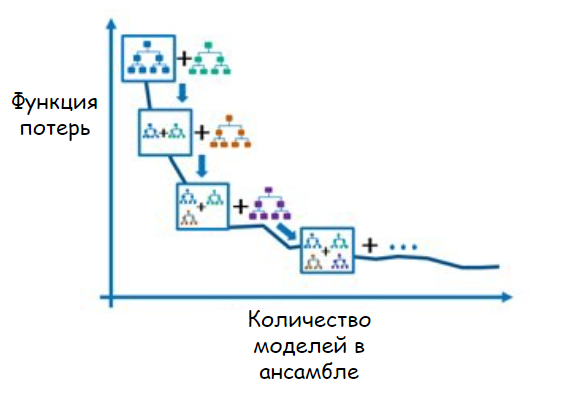

В качестве базовой модели можно использовать всё что угодно, но общепринятым является использование деревьев решений. Практика показывает, что это наилучший выбор, так как деревья решений очень просты в построении и из всех слабых моделей обладают наилучшей способностью описывать сложные зависимости.

Бустинг, использующий в качестве базовой модели дерево решений, называется градиентным бустингом над деревьями решений (Gradient Boosting on Decision Trees, GBDT). 

Схематично работу алгоритма GBDT можно представить следующим образом:

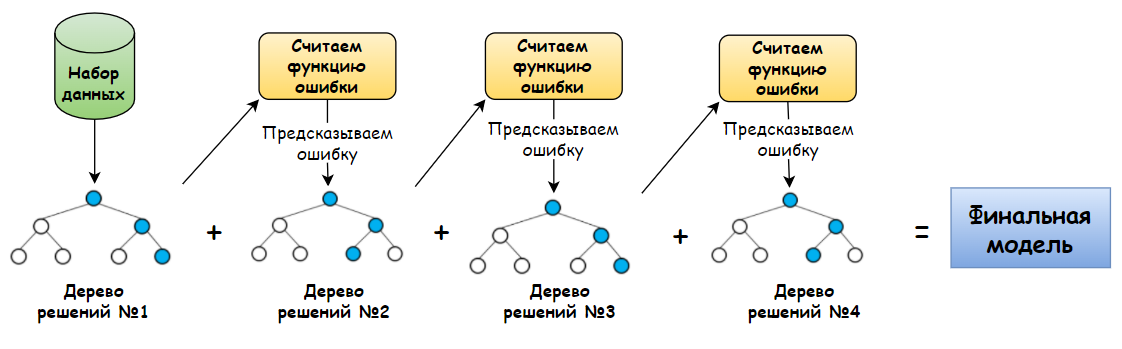

Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях. Это преимущество стало причиной доминирования GBDT на огромном спектре соревнований — от кредитного скоринга до рекомендательных систем.

В заключение введения в градиентный бустинг приведём некоторые рекомендации по выбору внешних параметров алгоритма:

Количество деревьев (n_estimators). Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке.
Темп обучения  (learning_rate). Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1.
Максимальная глубина деревьев (max_depth). Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.
→ Все параметры влияют на обучение комплексно, поэтому их следует подбирать одновременно. О том, какие инструменты для этого существуют, мы поговорим в отдельном модуле.

Чтобы понять, как на градиентный бустинг влияют параметры темпа обучения, максимальной глубины деревьев и количества деревьев, предлагаем вам поиграть с настройками градиентного бустинга интерактивной демонстрации Brilliantly wrong.

Вы можете регулировать следующие параметры:

tree depth — максимальная глубина деревьев;
learning rate — темп обучения;
subsample — процент выборки, отведённый на обучение;
trees — количество деревьев.
На демонстрации вы сможете увидеть, как меняется функция ошибки на тренировочной (train loss) и тестовой (test loss) выборках при изменении параметров, а также как меняется вид разделяющей поверхности.

Пример:

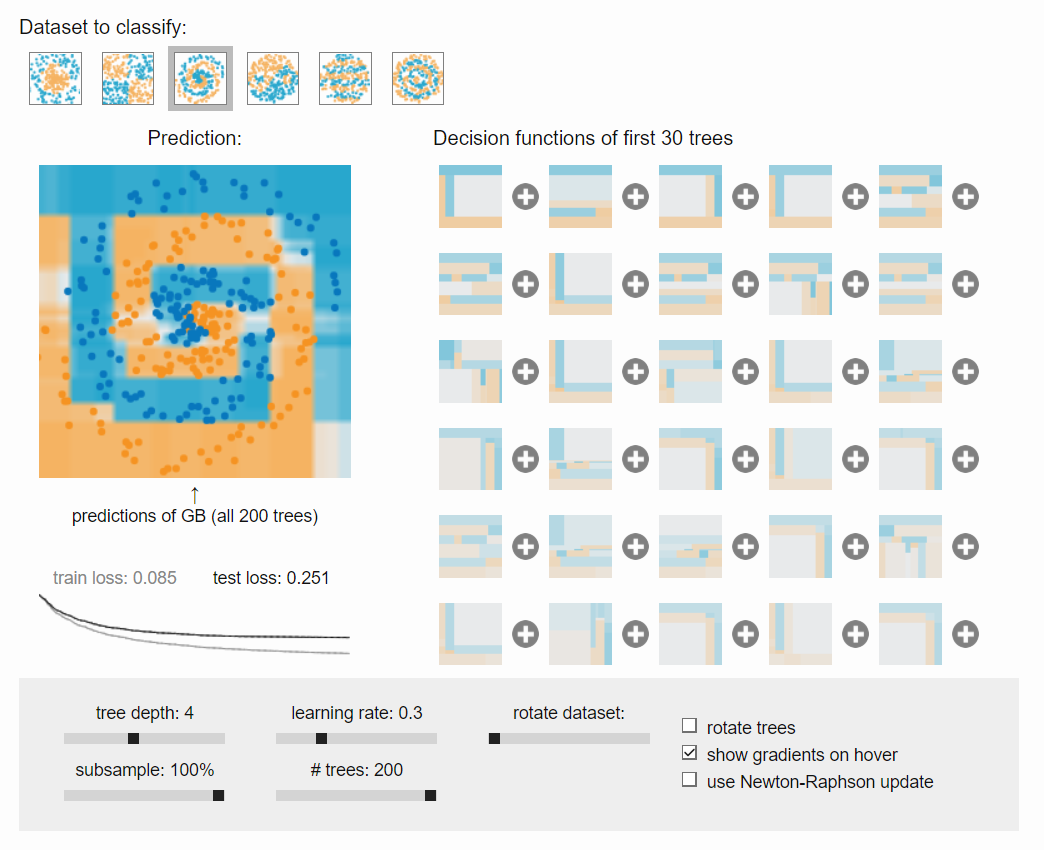

ГРАДИЕНТНЫЙ БУСТИНГ В SKLEARN

→ Скачайте ноутбук с кодом Это ноутбук из предыдущего юнита — если вы скачали его ранее, заново скачивать не нужно.

Как и все ансамбли, градиентный бустинг находится в модуле ensemble библиотеки sklearn. В качестве входных данных продолжим использовать данные о диабете.

 Градиентный бустинг над деревьями для решения задачи регрессии реализован в классе GradientBoostingRegressor. Для задачи классификации данный метод реализован в классе GradientBoostingClassifier. Параметры у классов схожи, различия только в функции потерь. Поэтому мы можем рассмотреть параметры GradientBoostingRegressor, подразумевая, что у классификатора они идентичны.

Основные параметры GradientBoostingRegressor:

loss — функция потерь. По умолчанию в регрессии 'squared_loss' - наша любимая MSE, а в классификации 'deviance' - логистическая функция потерь (logloss).
learning_rate — темп обучения. По умолчанию 0.1. 
n_estimators — количество деревьев в бустинге (число  из бустинга). По умолчанию равно 100.
max_depth — максимальная глубина одного дерева. По умолчанию равна 3 — строятся короткие деревья с большим смещением.
min_samples_leaf — минимальное число объектов в листе. По умолчанию 1.
random_state — число, отвечающее за генерацию случайных чисел.
✍️ Давайте построим модель градиентного бустинга над деревьями решений. Продолжим использовать данные о диабете:

from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
# Будет выведено:
# Качество предсказания по MSE для GradientBoosting 3477.3
 

Как мы видим, при прочих равных, градиентный бустинг дал нам чуть более высокий показатель метрики MSE по сравнению с адаптивным. Это означает, что качество градиентного бустинга оказалось хуже адаптивного.

⬇️ Однако не стоит расстраиваться, так как в зависимости от качества данных, от различных параметров, например количества базовых моделей, картина может измениться в обратную сторону. Пример таких параметров представлен в задании ниже. 

4.1 Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Остальные параметры оставьте неизменными.

Качество модели по MSE для 50 базовых моделей:

  нет ответа 
Качество модели по MSE для 100 базовых моделей:

In [22]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Будет выведено:
# Качество предсказания по MSE для AdaBoost 3116.48

Качество предсказания по MSE для AdaBoost 3040.83


In [24]:
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)
 
ada = AdaBoostRegressor(
	base_estimator=dt,
random_state=42, 
n_estimators=50
)
ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')
 
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)
 
ada = AdaBoostRegressor(
base_estimator=dt,
random_state=42, 
n_estimators=100
)
ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

Качество предсказания по MSE для AdaBoost 2991.76


d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Качество предсказания по MSE для AdaBoost 3101.68


4.5 Измените количество базовых моделей с 10 до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

Качество модели по MSE для 50 базовых моделей:

не
  нет ответа 
Качество модели по MSE для 100 базовых моделей:

  нет ответа 


In [25]:
# не решение
from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
# Будет выведено:
# Качество предсказания по MSE для GradientBoosting 3477.3

Качество предсказания по MSE для GradientBoostingRegressor 3477.3


In [26]:
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)


# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
# Будет выведено:
# Качество предсказания по MSE для GradientBoosting 3477.3
#50 - 3100.08
#100 - 3286.02 (верный - 3288.72 ?)

Качество предсказания по MSE для GradientBoostingRegressor 3286.02


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
 
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 3286.02


4.6 Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

accuracy на тестовой выборке:

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('data/winequality-red.csv', sep = ';')

# Создаем матрицу наблюдений
X = df.drop(['quality'],axis = 1)
# Создаем вектор признаков для бинарной классификации
y = (df['quality'] >5).astype(int)

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# Посмотрим на размерности выборок
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (1071, 11)
# Размерность тестовой выборки (528, 11)

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


In [33]:
# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42, #генератор случайных чисел
    min_samples_leaf = 10
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       238
           1       0.81      0.81      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



In [34]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       238
           1       0.77      0.73      0.75       290

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528



In [35]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.75      0.73       238
           1       0.79      0.76      0.77       290

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.76      0.75      0.75       528



In [36]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       238
           1       0.81      0.83      0.82       290

    accuracy                           0.80       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.80      0.80      0.80       528



С каждым новым слагаемым в композиции мы уменьшаем ошибку на обучающей выборке и можем уменьшить её вплоть до 0.


Какими способами можно бороться с переобучением градиентного бустинга над деревьями решений, если их производить независимо друг от друга?

B Уменьшать максимальную глубину деревьев
D Уменьшать темп обучения n(с длинной правой ногой)
F Уменьшать количество алгоритмов

B Верно. Уменьшая этот параметр, мы можем уменьшить разброс модели.
D Верно. Уменьшая этот параметр, мы можем уменьшить разброс модели.
F Верно. Уменьшая этот параметр, мы можем уменьшить разброс модели.

⭐️ Поздравляем! Мы разобрали практически все ныне существующие методы ансамблирования — от самых простых, которые легли в основу случайного леса, до самых передовых (градиентных бустингов). Мы посмотрели на реализации в библиотеке sklearn, постарались разобрать методологию и основные параметры каждой модели. 

Основными рекомендациями по использованию ансамблей является использование случайных лесов и градиентных бустингов в первую очередь для классических задач классификации и регрессии с простыми табличными данными, так как подавляющее большинство соревнований в этой области было выиграно именно благодаря этим двум моделям. 

После данного модуля может сложиться впечатление, что ансамблирование — всегда лучший вариант для финальной модели, однако часто в задачах требуется интерпретируемость результатов, которой не могу похвастаться бустинг и стекинг. 

Кроме того, использование случайного леса на данных с большим количеством выбросов может привести к тому, что модель будет обучается на данных, у которых дисперсия в разы больше, чем у исходных, так как подвыборка для обучения выбирается случайно. Таким образом, мы не сможем получить выигрыш в дисперсии, который нам даёт ансамблирование. 

В заключение приведём таблицу преимуществ и недостатков методов ансамблирования:

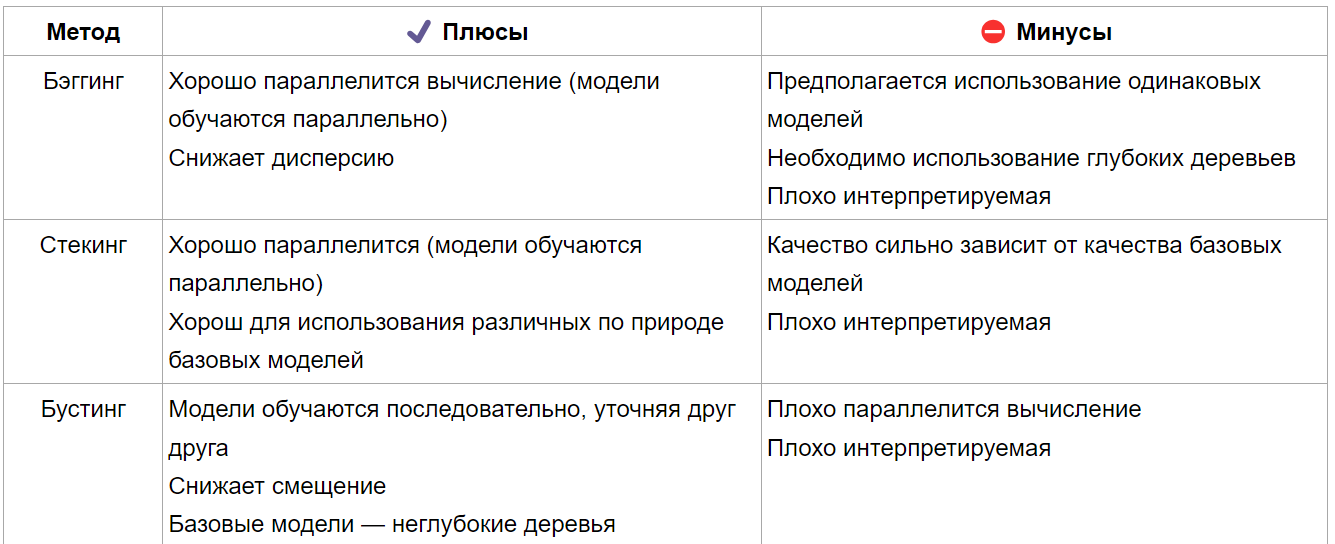

Метод

 ✔️ Плюсы

⛔ Минусы

Бэггинг

Хорошо параллелится вычисление (модели обучаются параллельно)

Снижает дисперсию

Предполагается использование одинаковых моделей

Необходимо использование глубоких деревьев

Плохо интерпретируемая

Стекинг

Хорошо параллелится (модели обучаются параллельно)

Хорош для использования различных по природе базовых моделей

Качество сильно зависит от качества базовых моделей

Плохо интерпретируемая

Бустинг

Модели обучаются последовательно, уточняя друг друга

Снижает смещение

Базовые модели — неглубокие деревья

Плохо параллелится вычисление

Плохо интерпретируемая